In [1]:
!pip install gdown --quiet

In [2]:
import gdown

url = "https://drive.google.com/uc?id=1RhakmYA0l99TEQLbHan9rfEyj12hPYL8"

output = 'video.mp4'

gdown.download(url, output)

Downloading...
From (original): https://drive.google.com/uc?id=1RhakmYA0l99TEQLbHan9rfEyj12hPYL8
From (redirected): https://drive.google.com/uc?id=1RhakmYA0l99TEQLbHan9rfEyj12hPYL8&confirm=t&uuid=7bc54379-28f5-49f0-86c8-fa4ef75fb146
To: /kaggle/working/video.mp4
100%|██████████| 664M/664M [00:05<00:00, 125MB/s]  


'video.mp4'

In [3]:
SOURCE_VIDEO_PATH = "/kaggle/working/video.mp4"

In [4]:
!nvidia-smi

Fri Feb 16 15:17:57 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.129.03             Driver Version: 535.129.03   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [5]:
import os
HOME = os.getcwd()
print(HOME)

/kaggle/working


# Install YOLO v8

In [6]:
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5432.0/8062.4 GB disk)


In [7]:
from ultralytics import YOLO

from IPython.display import display, Image

In [8]:
!pip install --upgrade pip --quiet

In [9]:
!pip install --upgrade jupyter-lsp packaging shapely --quiet

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf 23.8.0 requires cubinlinker, which is not installed.
cudf 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
cudf 23.8.0 requires ptxcompiler, which is not installed.
cuml 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
dask-cudf 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
cudf 23.8.0 requires cuda-python<12.0a0,>=11.7.1, but you have cuda-python 12.3.0 which is incompatible.
cudf 23.8.0 requires pandas<1.6.0dev0,>=1.3, but you have pandas 2.1.4 which is incompatible.
cudf 23.8.0 requires protobuf<5,>=4.21, but you have protobuf 3.20.3 which is incompatible.
cuml 23.8.0 requires dask==2023.7.1, but you have dask 2024.1.0 which is incompatible.
cuml 23.8.0 requires distributed==2023.7.1, but you have distributed 2024.1.0 which is incompatible.
dask-cuda 23.8.0 require

In [17]:
!mkdir {HOME}/datasets/Pose-Estimation-1
%cd {HOME}/datasets/Pose-Estimation-1

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="FMJblBkjpLkjWDc3Sr3N")
project = rf.workspace("fyp-fqnbg").project("pose-estimation-sp3pq")
dataset = project.version(1).download("yolov5")

mkdir: cannot create directory '/kaggle/working/datasets/Pose-Estimation-1': File exists
/kaggle/working/datasets/Pose-Estimation-1
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Pose-Estimation-1 in yolov5pytorch:: 100%|██████████| 952/952 [00:00<00:00, 6728.45it/s]


In [18]:
print(dataset.location)

/kaggle/working/datasets/Pose-Estimation-1/Pose-Estimation-1


In [19]:
%cd {HOME}

 !yolo pose train data=/kaggle/working/datasets/Pose-Estimation-1/Pose-Estimation-1/data.yaml model=yolov8n-pose.pt epochs=100 imgsz=640

/kaggle/working
New https://pypi.org/project/ultralytics/8.1.14 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=pose, mode=train, model=yolov8x-pose.pt, data=/kaggle/working/datasets/Pose-Estimation-1/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=N

In [22]:
!ls {HOME}/runs/pose/train3

BoxF1_curve.png					   results.png
BoxPR_curve.png					   train_batch0.jpg
BoxP_curve.png					   train_batch1.jpg
BoxR_curve.png					   train_batch1800.jpg
PoseF1_curve.png				   train_batch1801.jpg
PosePR_curve.png				   train_batch1802.jpg
PoseP_curve.png					   train_batch2.jpg
PoseR_curve.png					   val_batch0_labels.jpg
args.yaml					   val_batch0_pred.jpg
confusion_matrix.png				   val_batch1_labels.jpg
confusion_matrix_normalized.png			   val_batch1_pred.jpg
events.out.tfevents.1708097778.af9cbe0933e9.198.0  val_batch2_labels.jpg
labels.jpg					   val_batch2_pred.jpg
labels_correlogram.jpg				   weights
results.csv


/kaggle/working


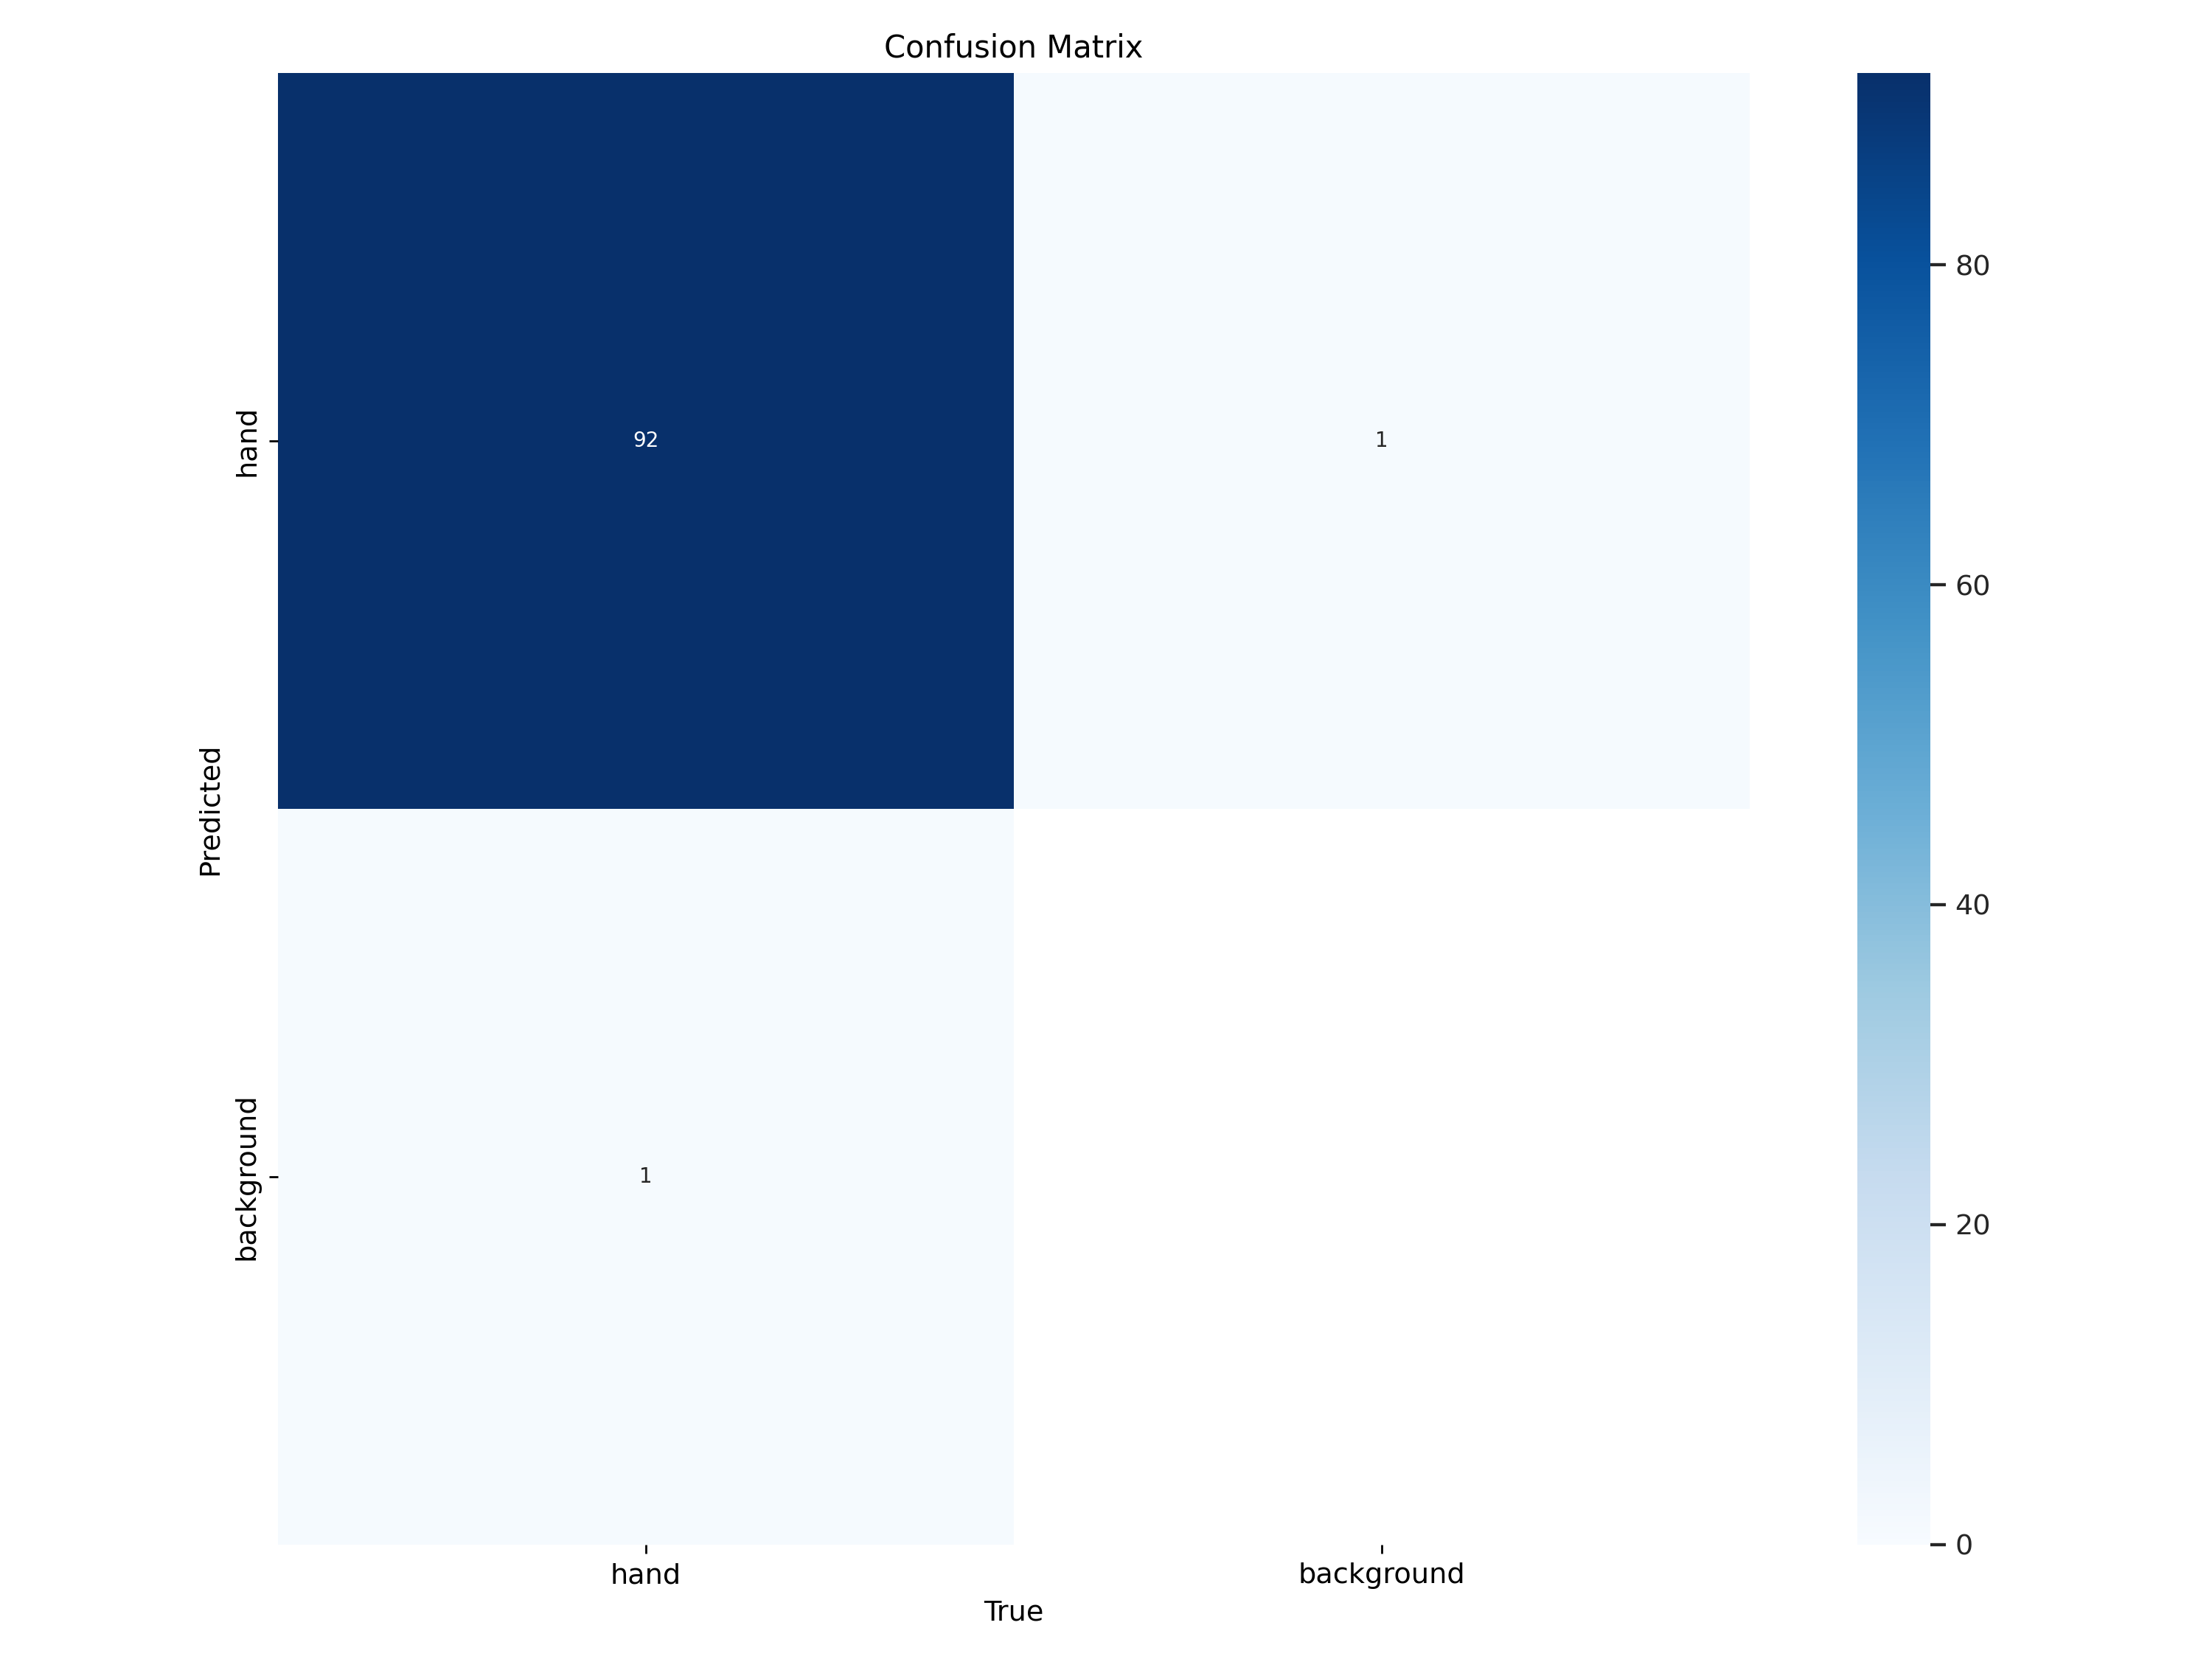

In [23]:
%cd {HOME}
Image(filename=f'{HOME}/runs/pose/train3/confusion_matrix.png', width=600)

/kaggle/working


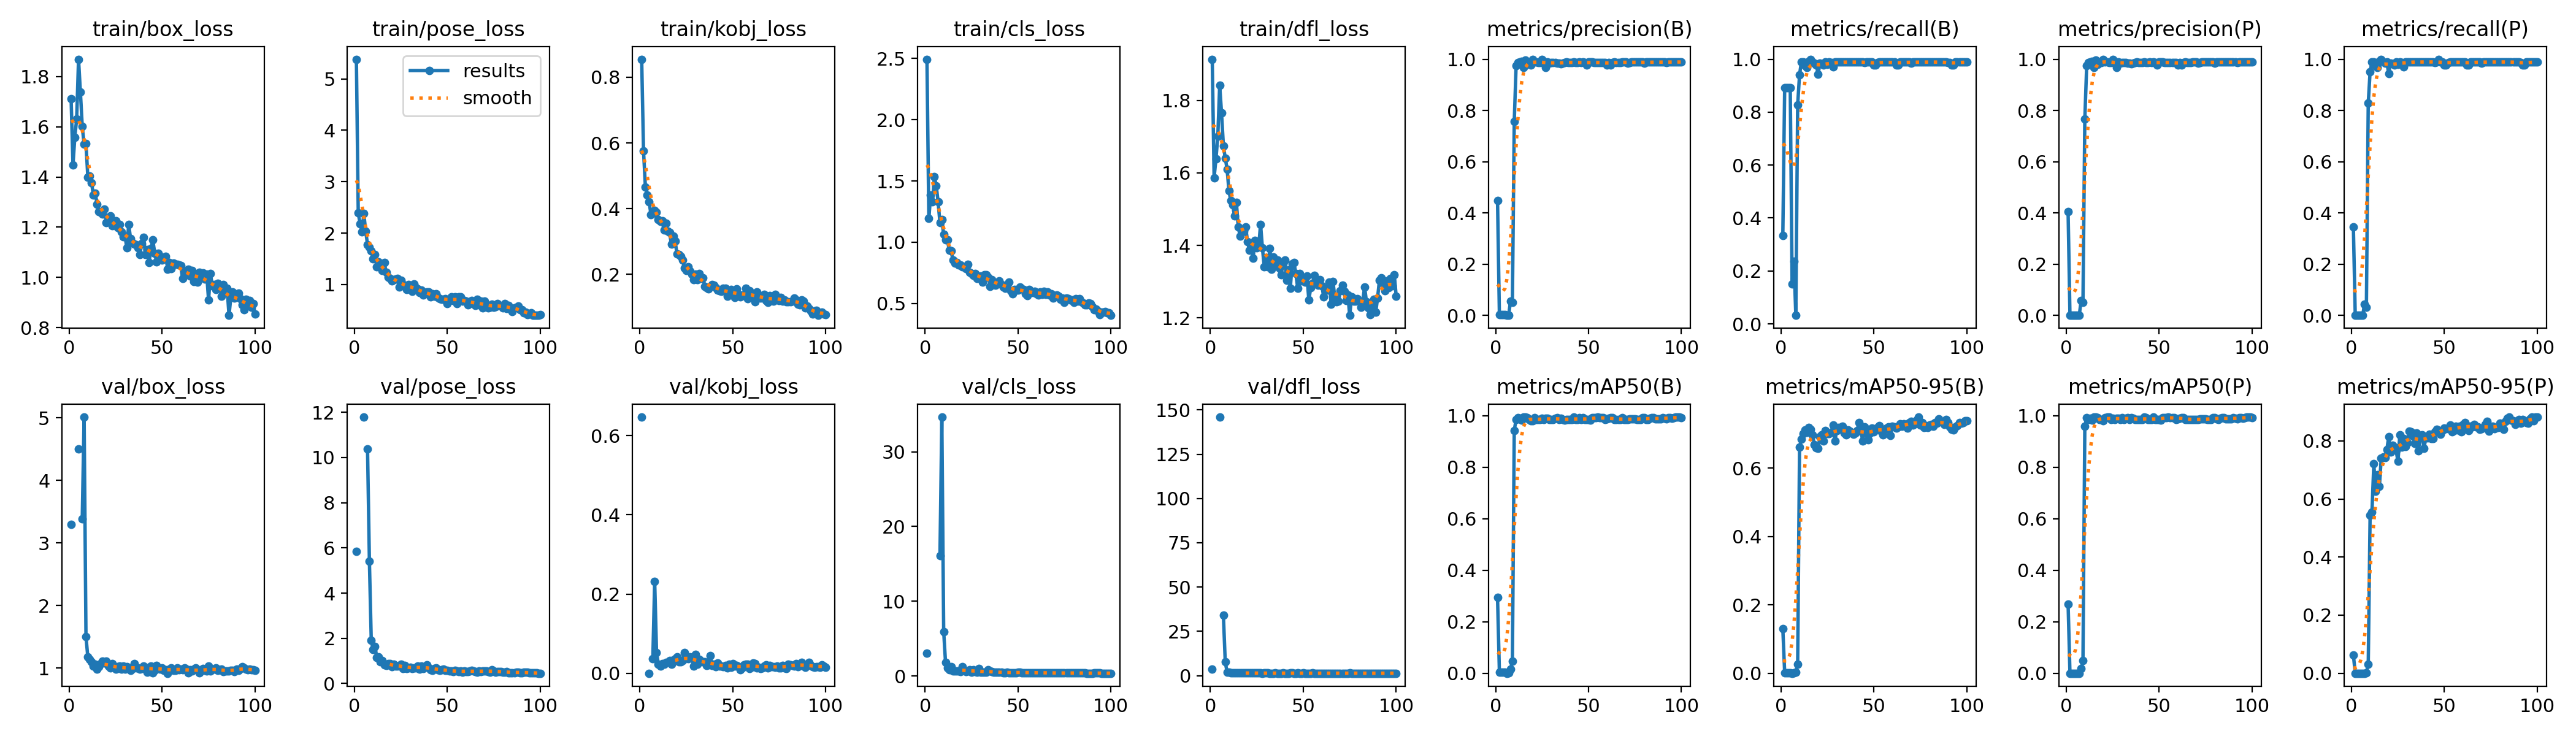

In [24]:
%cd {HOME}
Image(filename=f'{HOME}/runs/pose/train3/results.png', width=600)

/kaggle/working


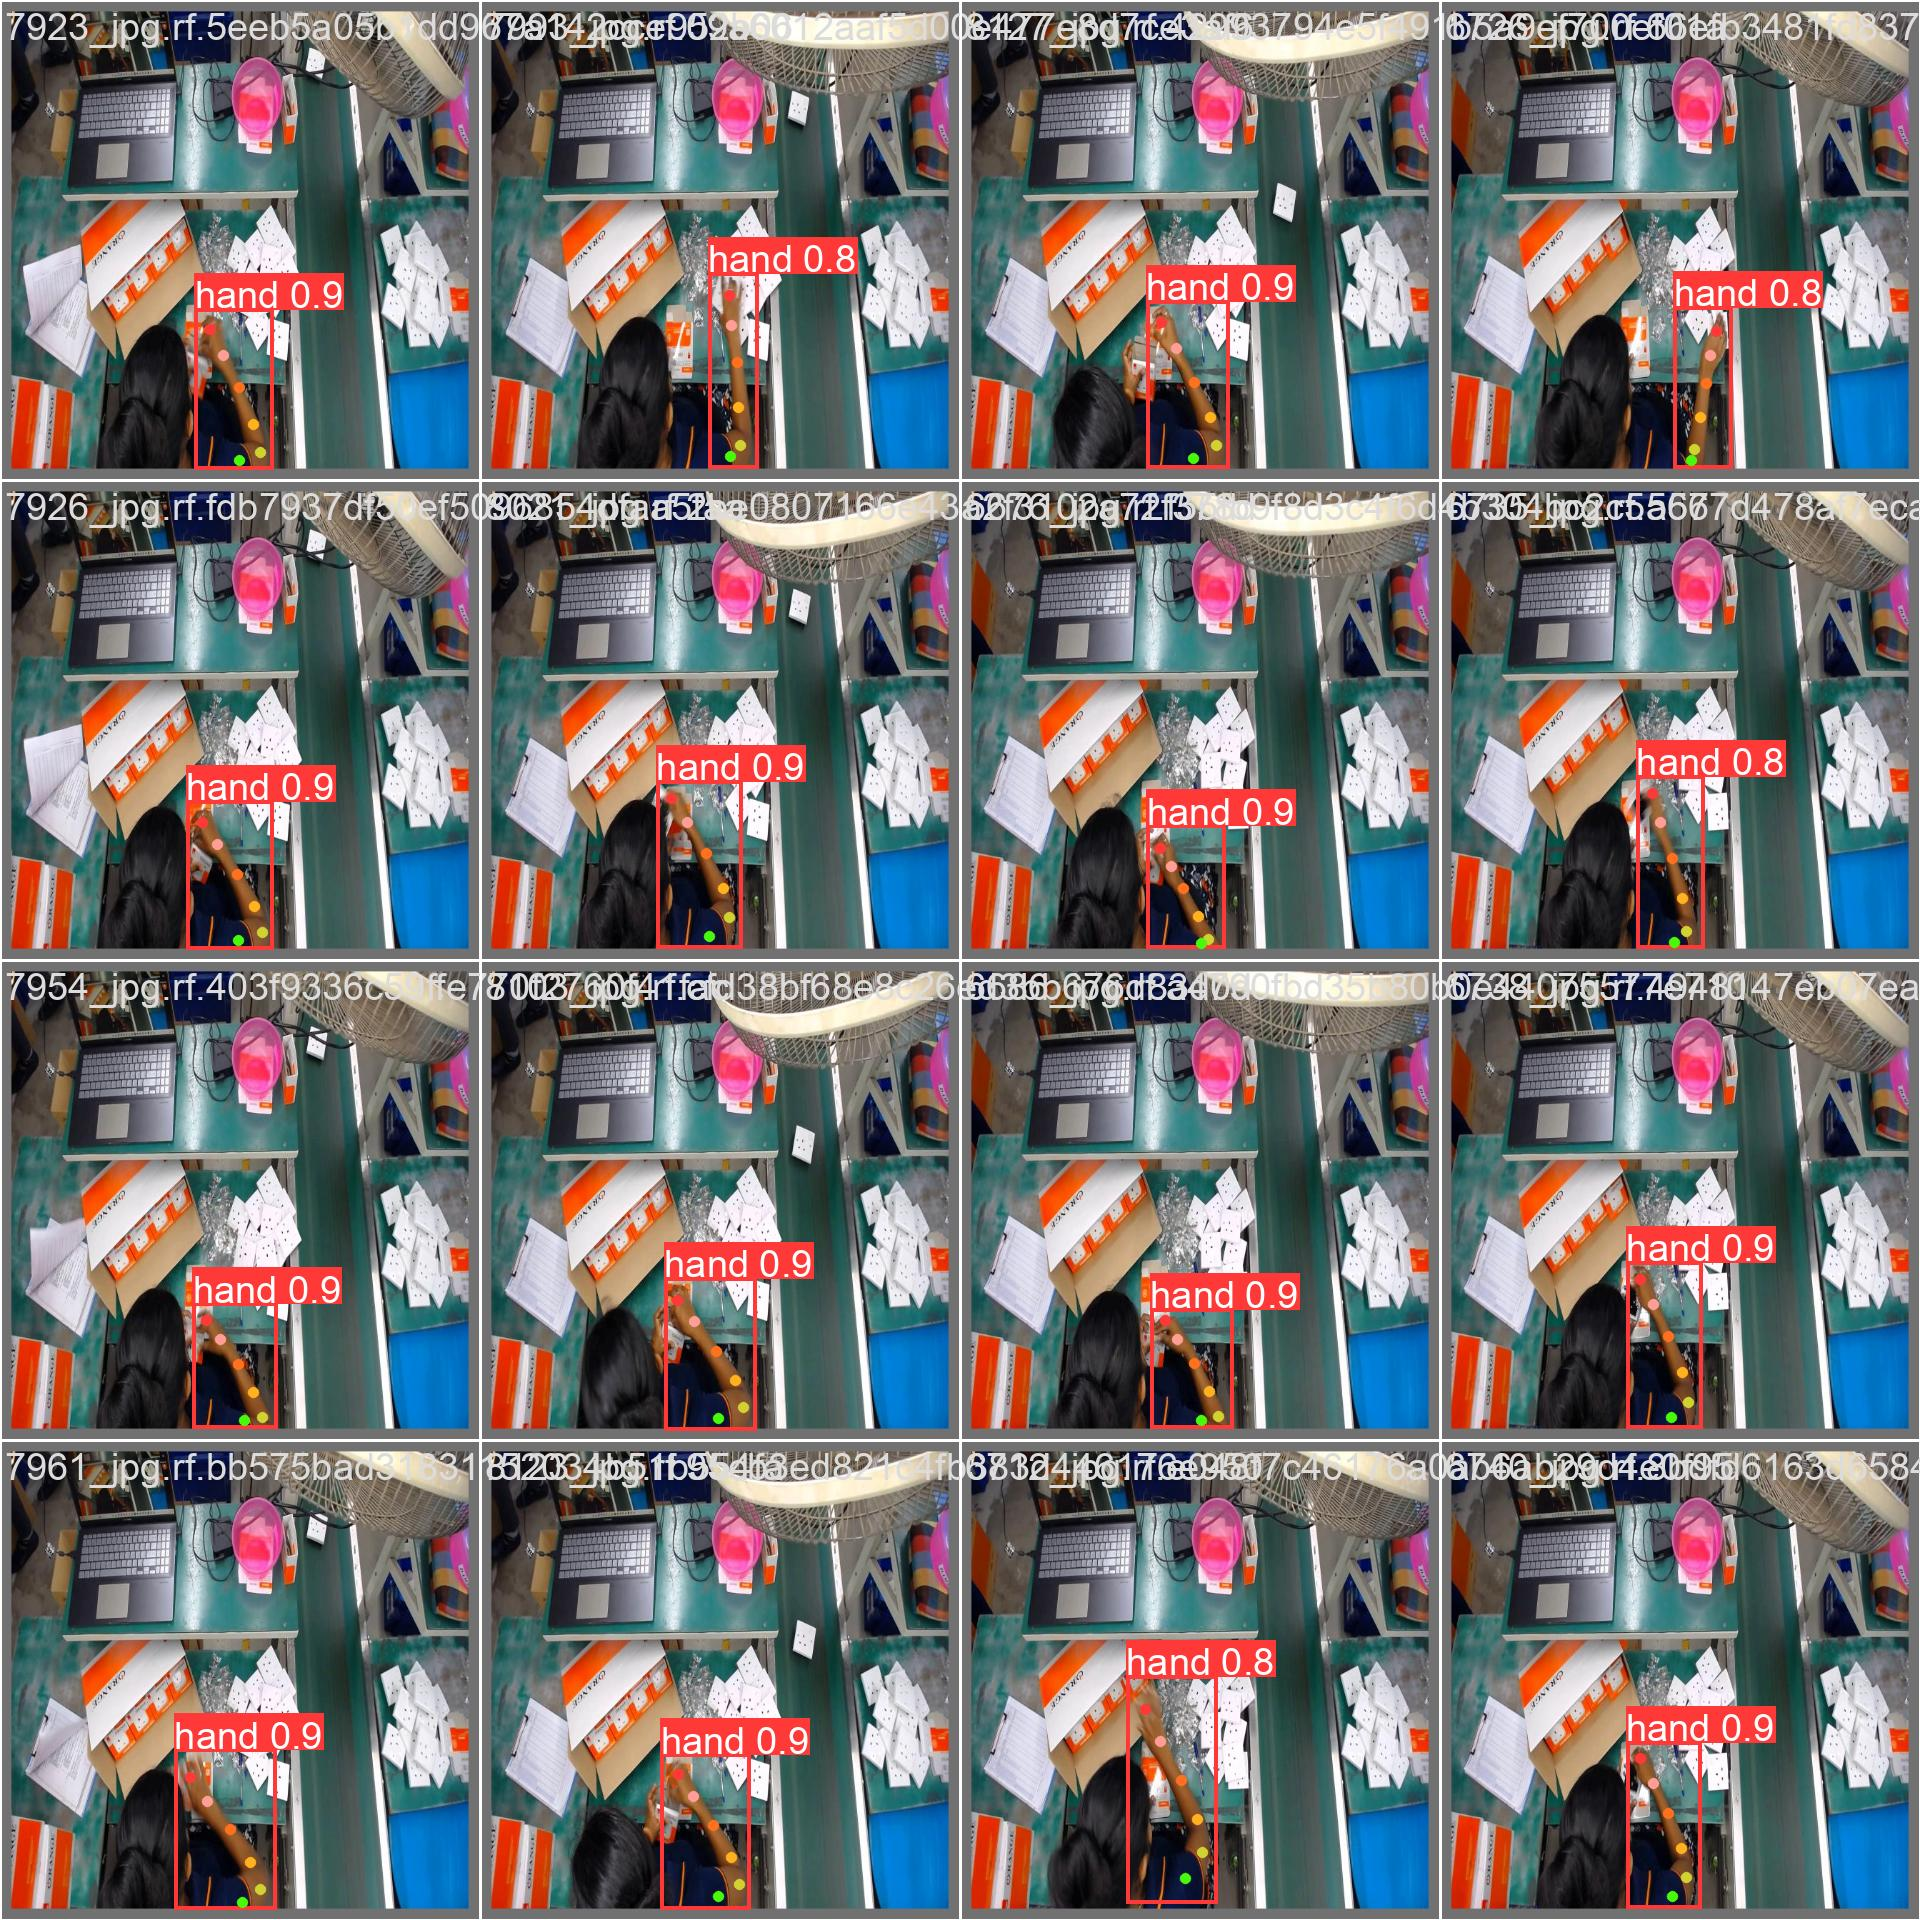

In [25]:
%cd {HOME}
Image(filename=f'{HOME}/runs/pose/train3/val_batch0_pred.jpg', width=600)

# Validate model

In [27]:
%cd {HOME}
!yolo pose val model=/kaggle/working/runs/pose/train3/weights/best.pt data = /kaggle/working/datasets/Pose-Estimation-1/data.yaml

/kaggle/working
Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8x-pose summary (fused): 287 layers, 69454185 parameters, 0 gradients, 263.2 GFLOPs
val: Scanning /kaggle/working/datasets/Pose-Estimation-1/Pose-Estimation-1/valid
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         91         93      0.989      0.989      0.992      0.746      0.989      0.989      0.992      0.879
Speed: 3.2ms preprocess, 53.4ms inference, 0.0ms loss, 9.9ms postprocess per image
Results saved to runs/pose/val2
💡 Learn more at https://docs.ultralytics.com/modes/val


# Inference with model

In [28]:
%cd {HOME} 
!yolo pose predict model=/kaggle/working/runs/pose/train3/weights/best.pt conf=0.25 source={dataset.location}/test/images

/kaggle/working
Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8x-pose summary (fused): 287 layers, 69454185 parameters, 0 gradients, 263.2 GFLOPs

image 1/60 /kaggle/working/datasets/Pose-Estimation-1/Pose-Estimation-1/test/images/6687_jpg.rf.8494a7fd855ae47aceb4dde37426acc7.jpg: 640x640 1 hand, 99.6ms
image 2/60 /kaggle/working/datasets/Pose-Estimation-1/Pose-Estimation-1/test/images/6805_jpg.rf.de99eb89f388a6ad02b6b44b17d9e4ac.jpg: 640x640 1 hand, 53.0ms
image 3/60 /kaggle/working/datasets/Pose-Estimation-1/Pose-Estimation-1/test/images/6836_jpg.rf.72a28c75f2e5944742bf43dea68fdfc1.jpg: 640x640 1 hand, 53.3ms
image 4/60 /kaggle/working/datasets/Pose-Estimation-1/Pose-Estimation-1/test/images/6886_jpg.rf.54ff0afcdb0d65fb388428cf40aa1d10.jpg: 640x640 1 hand, 53.6ms
image 5/60 /kaggle/working/datasets/Pose-Estimation-1/Pose-Estimation-1/test/images/6917_jpg.rf.c1bbe8dcfa244e7eb281819f6e235f27.jpg: 640x640 1 hand, 51.2ms
image 6/60 /kaggle/working/

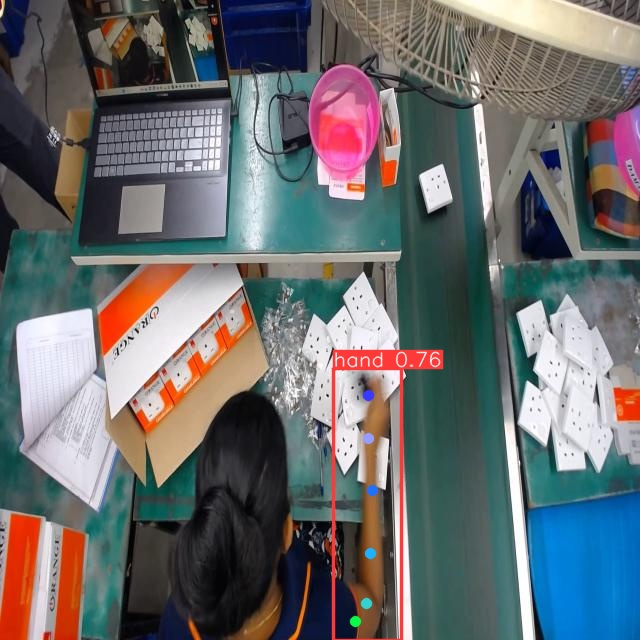

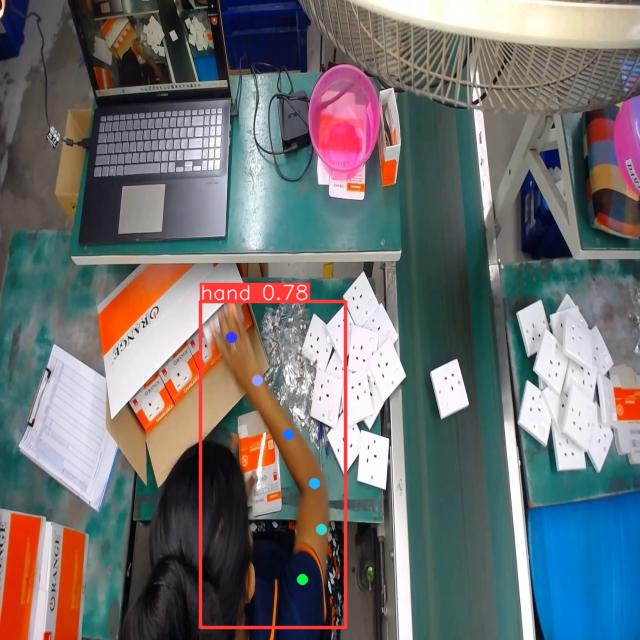

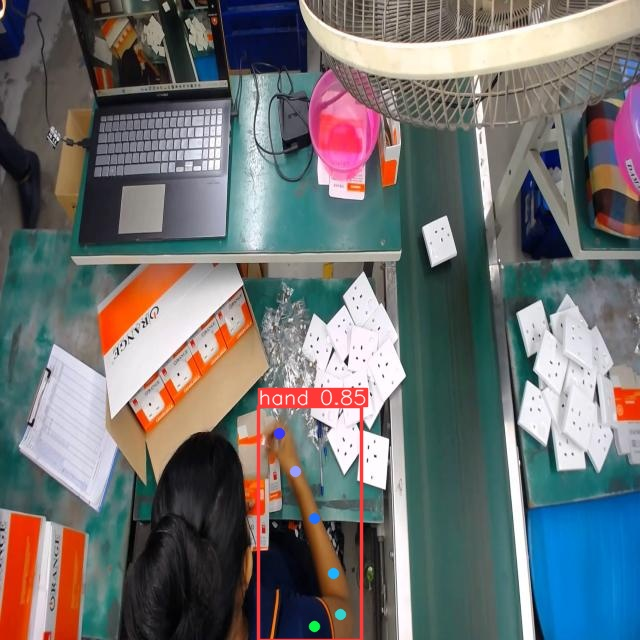

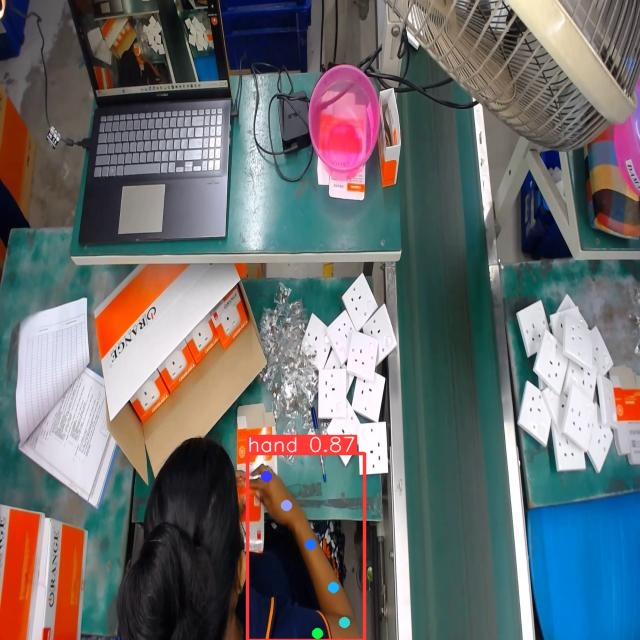

In [33]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/pose/predict/*.jpg')[:4]:
      display(Image(filename=image_path, width=300, height=300))
      print("\n")

In [40]:
%cd {HOME} 
!yolo pose predict model=/kaggle/working/runs/pose/train3/weights/best.pt conf=0.25 source=/kaggle/working/video.mp4

/kaggle/working
Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8x-pose summary (fused): 287 layers, 69454185 parameters, 0 gradients, 263.2 GFLOPs

video 1/1 (1/8771) /kaggle/working/video.mp4: 384x640 2 hands, 99.1ms
video 1/1 (2/8771) /kaggle/working/video.mp4: 384x640 2 hands, 56.4ms
video 1/1 (3/8771) /kaggle/working/video.mp4: 384x640 2 hands, 56.4ms
video 1/1 (4/8771) /kaggle/working/video.mp4: 384x640 2 hands, 56.3ms
video 1/1 (5/8771) /kaggle/working/video.mp4: 384x640 2 hands, 48.0ms
video 1/1 (6/8771) /kaggle/working/video.mp4: 384x640 2 hands, 40.4ms
video 1/1 (7/8771) /kaggle/working/video.mp4: 384x640 2 hands, 40.5ms
video 1/1 (8/8771) /kaggle/working/video.mp4: 384x640 2 hands, 32.7ms
video 1/1 (9/8771) /kaggle/working/video.mp4: 384x640 2 hands, 32.6ms
video 1/1 (10/8771) /kaggle/working/video.mp4: 384x640 2 hands, 32.5ms
video 1/1 (11/8771) /kaggle/working/video.mp4: 384x640 2 hands, 29.6ms
video 1/1 (12/8771) /kaggle/working/vide

In [44]:
%cd /kaggle/working/runs/pose/predict2
!ls

/kaggle/working/runs/pose/predict2
video.avi


In [51]:
from tqdm import tqdm
import zipfile

def zip_dir(directory, zip_filename):
    files = os.listdir(directory)
    
    progress = tqdm(total=len(files), desc="Zipping")
    
    with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
        
        for file in files:
            zipf.write(os.path.join(directory, file), arcname=file)
            progress.update(1)
    progress.close()

directory_to_zip = '/kaggle/working/runs/pose/predict2'
zip_filename = '/kaggle/working/pose_output.zip'

zip_dir(directory_to_zip, zip_filename)

Zipping: 100%|██████████| 1/1 [01:16<00:00, 76.08s/it]


In [56]:
%cd {HOME}
from IPython.display import FileLink
FileLink(r'pose_output.zip')

/kaggle/working


/kaggle/working/pose_output.zip

In [54]:
%cd {HOME}/runs/pose/train3/
!ls

/kaggle/working/runs/pose/train3
BoxF1_curve.png					   results.png
BoxPR_curve.png					   train_batch0.jpg
BoxP_curve.png					   train_batch1.jpg
BoxR_curve.png					   train_batch1800.jpg
PoseF1_curve.png				   train_batch1801.jpg
PosePR_curve.png				   train_batch1802.jpg
PoseP_curve.png					   train_batch2.jpg
PoseR_curve.png					   val_batch0_labels.jpg
args.yaml					   val_batch0_pred.jpg
confusion_matrix.png				   val_batch1_labels.jpg
confusion_matrix_normalized.png			   val_batch1_pred.jpg
events.out.tfevents.1708097778.af9cbe0933e9.198.0  val_batch2_labels.jpg
labels.jpg					   val_batch2_pred.jpg
labels_correlogram.jpg				   weights
results.csv


In [36]:
from tqdm import tqdm
import zipfile

def zip_dir(directory, zip_filename):
    files = os.listdir(directory)
    
    progress = tqdm(total=len(files), desc="Zipping")
    
    with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
        
        for file in files:
            zipf.write(os.path.join(directory, file), arcname=file)
            progress.update(1)
    progress.close()

directory_to_zip = '/kaggle/working/runs/pose/train3/'
zip_filename = '/kaggle/working/train_out.zip'

zip_dir(directory_to_zip, zip_filename)

directory_to_zip_2 = '/kaggle/working/runs/pose/train3/weights/'
zip_filename_2 = '/kaggle/working/train_weights_out.zip'

zip_dir(directory_to_zip_2, zip_filename_2)

Zipping: 100%|██████████| 2/2 [00:14<00:00,  7.43s/it]


In [37]:
%cd {HOME}

/kaggle/working


In [38]:
from IPython.display import FileLink
FileLink(r'train_out.zip')

/kaggle/working/train_out.zip

In [39]:
FileLink(r'train_weights_out.zip')

/kaggle/working/train_weights_out.zip